In [3]:
# NO CODE

from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
from scipy import stats

## The Distribution of the Estimated Slope ##

Our estimate of the signal $Y = \beta_0 + \beta_1x$ is the corresponding point on the regression line:

$$
\hat{Y} ~ = ~ \hat{\beta}_0 + \hat{\beta}_1x
$$

Here $\hat{\beta}_1$ is the slope of the regression line (we called it $\hat{a}$ in our earlier calculations) and $\hat{\beta_0}$ is the intercept (we called it $\hat{b}$) of the regression line.

Recall that when we derived the formula for the best slope $\hat{a}$, we first obtained

$$
\hat{a} ~ = ~ \frac{E(D_XD_Y)}{\sigma_X^2}
$$

where $D_X$ and $D_Y$ were the deviations of $X$ and $Y$. In our current context, we must apply this formula to the empirical distribution of the data. That's easier than it sounds. For example, the variance $\sigma_X^2$ is by definition the mean squared deviation, which becomes $\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2$. The mean product of deviations $E(D_XD_Y)$ becomes $\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})(Y_i - \bar{Y})$.

### Estimated Slope ###

The least-squares estimate of the true slope $\beta_1$ is the slope of the regression line, given by

$$
\hat{\beta}_1 ~ = ~ \frac{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})(Y_i - \bar{Y})}{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2}
$$

The average response $\bar{Y}$ is a linear combination of the independent normal random variables $Y_1, Y_2, \ldots, Y_n$. Therefore so is the $i$th deviation $\bar{Y_i} - \bar{Y}$ for each $i$. 

Thus $\hat{\beta}_1$ is a linear combination of the independent normal random variables $Y_1, Y_2, \ldots, Y_n$. Therefore the distribution of $\hat{\beta}_1$ is normal.

### Expectation of the Estimated Slope ###

To identify the mean of the distribution of $\hat{\beta}_1$, recall that $E(Y_i) = \beta_0 + \beta_1x_i$ and $E(\bar{Y}) = \beta_0 + \beta_1\bar{x}$. So

$$
E(Y_i - \bar{Y}) ~ = ~ \beta_1(x_i - \bar{x})
$$

Now

$$
\begin{align*}
E(\hat{\beta_1}) ~ &= ~ \frac{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})E(Y_i - \bar{Y})}{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2} \\ \\
&= ~ \frac{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})\beta_1(x_i - \bar{x})}{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2} \\ \\
&= ~ \frac{\beta_1\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2}{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2} \\ \\
&= ~ \beta_1
\end{align*}
$$

We have shown that $\hat{\beta_1}$ is an unbiased estimator of $\beta_1$.

The distribution of the estimated slope $\hat{\beta}_1$ is normal, centered at the true slope $\beta_1$.

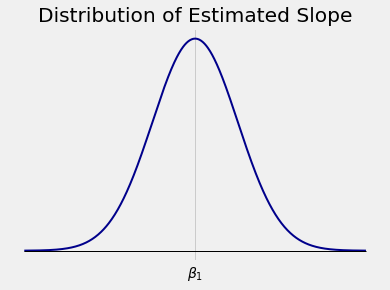

In [21]:
# NO CODE

x = np.arange(-4, 4.01, 0.01)
y = stats.norm.pdf(x)
plt.plot(x, y, lw=2, color='darkblue')
plt.plot([-4, 4], [0, 0], lw=1, color='k')
plt.xticks([0], [r'$\beta_1$'])
plt.yticks([])
plt.xlabel('')
plt.title('Distribution of Estimated Slope');

If we can find $Var(\hat{\beta}_1)$ then we can use this normal curve for inference. For example, 

$$
\hat{\beta}_1 ~ \pm ~ 2SD(\hat{\beta}_1)
$$

is an approximate 95% confidence interval for $\beta_1$.

### Variance of the Estimated Slope ###

To find $Var(\hat{\beta}_1)$ is helps to know how to find variances of sums of dependent random variables, which is outside the scope of this class. So we will simply state that

$$
Var(\hat{\beta}_1) ~ = ~ \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}
$$

In fact we will not use the exact formula for the variance. It is enough to notice that:

- The numerator is the constant error variance. The denominator gets larger (there are more terms) when $n$ increases. So the more data we have, the closer the estimated slope $\hat{\beta}_1$ will be to the true slope $\beta_1$, most likely.
- The expression for $Var(\hat{\beta}_1)$ involves the unknown error variance $\sigma^2$, but no other unknown parameter is involved.

### Standard Error of the Estimated Slope ###
We know that

$$
SD(\hat{\beta}_1) ~ = ~ \frac{\sigma}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2}}
$$

but we can't get a numerical value for this SD since $\sigma$ is unknown.

So we estimate $\sigma$ based on the data, by using the SD of the residuals instead. When the standard deviation of an estimator is estimated from the data, it is sometimes called the *standard error* of the estimator. We will denote the standard error of $\hat{\beta}_1$ by $SE(\hat{\beta}_1)$.

The larger $n$, the better the estimate of $\sigma$. So for large $n$, the distribution of the standardized slope

$$
T ~ = ~ \frac{\hat{\beta}_1 - \beta_1}{SE(\hat{\beta}_1)}
$$

is approximately normal.

Almost all programming languages and statistical systems come with modules or routines that carry out regression calculations. They will provide you with numerical values of $\hat{\beta}_1$ and $SE(\hat{\beta}_1)$. We will see some examples in the next section.

### $t$ Statistic ###

It turns out that it is possible to identify the exact distribution of $T$ for any sample size $n$. It is one of a family of bell-shaped distributions called the *$t$ distributions*. 

All $t$ distributions are symmetric around 0, just as the standard normal distribution is. 

The family of $t$ distributions is indexed by the positive integers: there's the $t$-distribution Number 1, the $t$-distribution Number 2, and so on. For reasons we won't go into, statisticians refer to the index as the *degrees of freedom* of the distribution.

Also for reasons we won't go into, the exact distribution of the standardized slope $T$ is $t$ Number $n-2$. That is, for all $n$, the standardized slope

$$
T ~ = ~ \frac{\hat{\beta}_1 - \beta_1}{SE(\hat{\beta}_1)}
$$

has the $t$ distribution with $n-2$ degrees of freedom. 

To remember the number of degrees of freedom, remember that we are basing our estimate of the response $Y$ on the two estimated parameters $\hat{\beta}_0$ and $\hat{\beta}_1$. Start with degrees of freedom equal to the sample size, and then lose one degree of freedom each for the intercept and slope. This rule can be extended to the case of multiple regression, as we will see in the next section.

The $t$ density looks like the standard normal curve, except that it has fatter tails. In the figure below, the red curve is the standard normal density and the blue curve is the $t$ density with $4$ degrees of freedom.

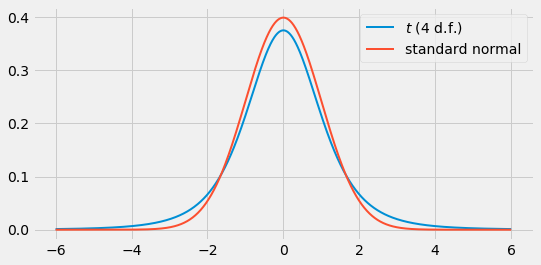

In [27]:
# NO CODE 

x = np.arange(-6, 6.01, 0.01)
t_density = stats.t.pdf(x, 4)
normal = stats.norm.pdf(x)
plt.figure(figsize=(8, 4))
plt.plot(x, t_density, lw=2, label='$t$ (4 d.f.)')
plt.plot(x, normal, lw = 2, label = 'standard normal')
plt.legend();

You can see that the $t$ distribution has a bit more weight in the tails than the standard normal does. It gives us just the right additional amount of wiggle room to account for the fact that we are estimating the unknown error variance $\sigma^2$ from the data.

When the degrees of freedom are larger (corresponding to larger sample sizes in our case), then the $t$ distributions are almost indistinguishable from the standard normal as you can see below. So it's fine to use normal approximations the estimated slope when the sample size is large. 

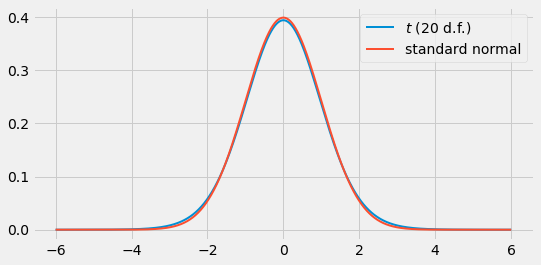

In [28]:
# NO CODE 

x = np.arange(-6, 6.01, 0.01)
t_density = stats.t.pdf(x, 20)
normal = stats.norm.pdf(x)
plt.figure(figsize=(8, 4))
plt.plot(x, t_density, lw=2, label='$t$ (20 d.f.)')
plt.plot(x, normal, lw = 2, label = 'standard normal')
plt.legend();

In the next section (the final one in this book!) we will use Python and the theory we have developed to carry out some regression analyses.